# 확률밀도함수
### data science study pg 408~409

**확률밀도함수** 
* 누적분포함수를 미분하여 구한 도함수
* 특정한 구간의 확률이 다른 구간에 비해 상대적으로 얼마나 높은가를 나타내는 것 
* 그 값 자체가  확률은 아니다

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 기울기(gradient) 구하기 범용함수
~~~
gradient는 1차 편미분한 값들로 구성된 배열이다. 
~~~

출처: https://rfriend.tistory.com/tag/np.gradient() [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

In [3]:
g=np.array([1, 2, 4, 10, 13, 20])

In [4]:
# [(2-1), {(2-1)+(4-2)}/2, {(4-2)+(10-4)}/2, {(10-4)+(13-10)}/2, {(13-10)+(20-13)}/2, (20-13)]
np.gradient(g)

array([1. , 1.5, 4. , 4.5, 5. , 7. ])

In [5]:
# [(2-1)/2, {(2-1)+(4-2)}/2*2, {(4-2)+(10-4)}/2*2, {(10-4)+(13-10)}/2*2, {(13-10)+(20-13)}/2*2, (20-13)/2] 
#x축 1의 단위가 2이므로 앙쪽 옆으로 x축 변화에 따른 y값 벼ㅕㄴ화를 보는 것이므로 2(단위)*2(방행)으로 나누어 줌
np.gradient(g,2)

array([0.5 , 0.75, 2.  , 2.25, 2.5 , 3.5 ])

## 원판 예제의 누적분포함수 아래에 확률밀도함수

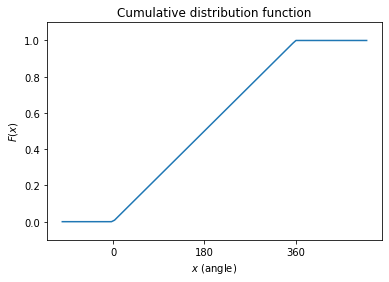

In [9]:
t = np.linspace(-100, 500, 100)
F = t / 360
F[t < 0] = 0
F[t > 360] = 1
plt.plot(t, F)
plt.ylim(-0.1, 1.1)
plt.xticks([0, 180, 360])
plt.title("Cumulative distribution function")
plt.xlabel("$x$ (angle)")
plt.ylabel("$F(x)$")
plt.show()

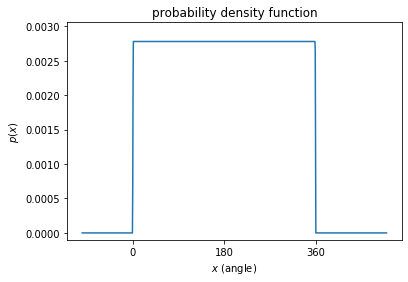

In [11]:
t = np.linspace(-100, 500, 1000)
F = t / 360
F[t < 0] = 0
F[t > 360] = 1
p = np.gradient(F, 600/1000)  # 수치미분
plt.plot(t, p)
plt.ylim(-0.0001, p.max()*1.1)
plt.xticks([0, 180, 360])
plt.title("probability density function")
plt.xlabel("$x$ (angle)")
plt.ylabel("$p(x)$")
plt.show()

### 6.4.5 연습문제)
~~~
0~180도 사이에 화살이 2배 더 잘 박히도록 조작된 원반을 이용하여 복권 번호를 결정하는 문제에서 확률밀도함수 P(x)를 구하라
~~~

#### 책 풀이)

In [12]:
def arrow_1(a):
    if a<0 or a>360:
        return 0
    elif a<180:
        return 2/3/180
    else:
        return 1/3/180

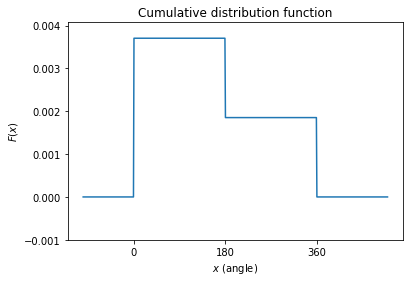

In [15]:
t = np.linspace(-100, 500, 600)
ps=np.array(list(map(arrow_1, t)))
plt.plot(t, ps)
plt.ylim(-0.001, ps.max()*1.1)
plt.xticks([0, 180, 360])
plt.title("Cumulative distribution function")
plt.xlabel("$x$ (angle)")
plt.ylabel("$F(x)$")
plt.show()